In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC


import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow are Object type data which needs to change to Int.

In [5]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Except Date and Location column every other column has NaN values

In [6]:
df = df.dropna(subset=['Rainfall','RainTomorrow'])

Dropped NaN present in the Label Columns

In [7]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['WindGustDir'] = df['WindGustDir'].fillna('N')
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(35.0)
df['WindDir9am'] = df['WindDir9am'].fillna('N')
df['WindDir3pm'] = df['WindDir3pm'].fillna('SE')
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(9.0)
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(9.0)
df['Humidity9am'] = df['Humidity9am'].fillna(73.0)
df['Humidity3pm'] = df['Humidity3pm'].fillna(51.0)
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(7.0)
df['Cloud3pm'] = df['Cloud3pm'].fillna(7.0)
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

- Used Mean to fill NaN in columns that have continuous data.
- Used Mode to fill NaN in columns that does not have continuous data.
- Used Mode to fill NaN in columns that has categorical data.

In [8]:
df = df.drop('Sunshine',axis=1)

Dropped the Sunshine column since half of the data is NaN hence filling the NaN would make the model biased.

In [9]:
for i in df.columns:
    a=df[i].value_counts()
    b=len(a.index)
    print(i,'column has',b,'categorical data counts\n')

Date column has 2957 categorical data counts

Location column has 12 categorical data counts

MinTemp column has 286 categorical data counts

MaxTemp column has 332 categorical data counts

Rainfall column has 250 categorical data counts

Evaporation column has 116 categorical data counts

WindGustDir column has 16 categorical data counts

WindGustSpeed column has 51 categorical data counts

WindDir9am column has 16 categorical data counts

WindDir3pm column has 16 categorical data counts

WindSpeed9am column has 33 categorical data counts

WindSpeed3pm column has 35 categorical data counts

Humidity9am column has 90 categorical data counts

Humidity3pm column has 94 categorical data counts

Pressure9am column has 383 categorical data counts

Pressure3pm column has 374 categorical data counts

Cloud9am column has 9 categorical data counts

Cloud3pm column has 9 categorical data counts

Temp9am column has 305 categorical data counts

Temp3pm column has 328 categorical data counts

RainT

Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow columns are the categorical columns

In [10]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

Endcoded data into Int

In [11]:
df.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,...,8079.00000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000
mean,1284.867929,5.775220,13.144839,23.855364,2.802451,5.434730,7.196559,39.385939,7.252630,7.808021,...,67.76705,51.207328,1017.732352,1015.310437,5.199282,5.180468,17.757271,22.443498,0.242481,0.238148
std,847.190840,3.174035,5.412351,6.104662,10.485324,3.897002,4.712348,13.848009,4.588372,4.433035,...,16.83488,18.364618,6.262483,6.193205,2.691977,2.581738,5.611654,5.933848,0.428610,0.425977
min,0.000000,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,10.00000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,575.000000,3.000000,9.200000,19.300000,0.000000,4.000000,3.000000,31.000000,3.000000,4.000000,...,56.00000,39.000000,1014.100000,1011.500000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000
50%,1095.000000,6.000000,13.200000,23.300000,0.000000,5.434730,7.000000,35.000000,7.000000,8.000000,...,68.00000,51.000000,1017.732352,1015.310437,7.000000,7.000000,17.757271,21.900000,0.000000,0.000000
75%,2011.000000,8.000000,17.300000,28.000000,1.000000,5.434730,12.000000,48.000000,12.000000,11.000000,...,80.00000,63.000000,1021.400000,1018.900000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000
max,2956.000000,11.000000,28.500000,45.500000,371.000000,145.000000,15.000000,107.000000,15.000000,15.000000,...,100.00000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


In [12]:
x = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

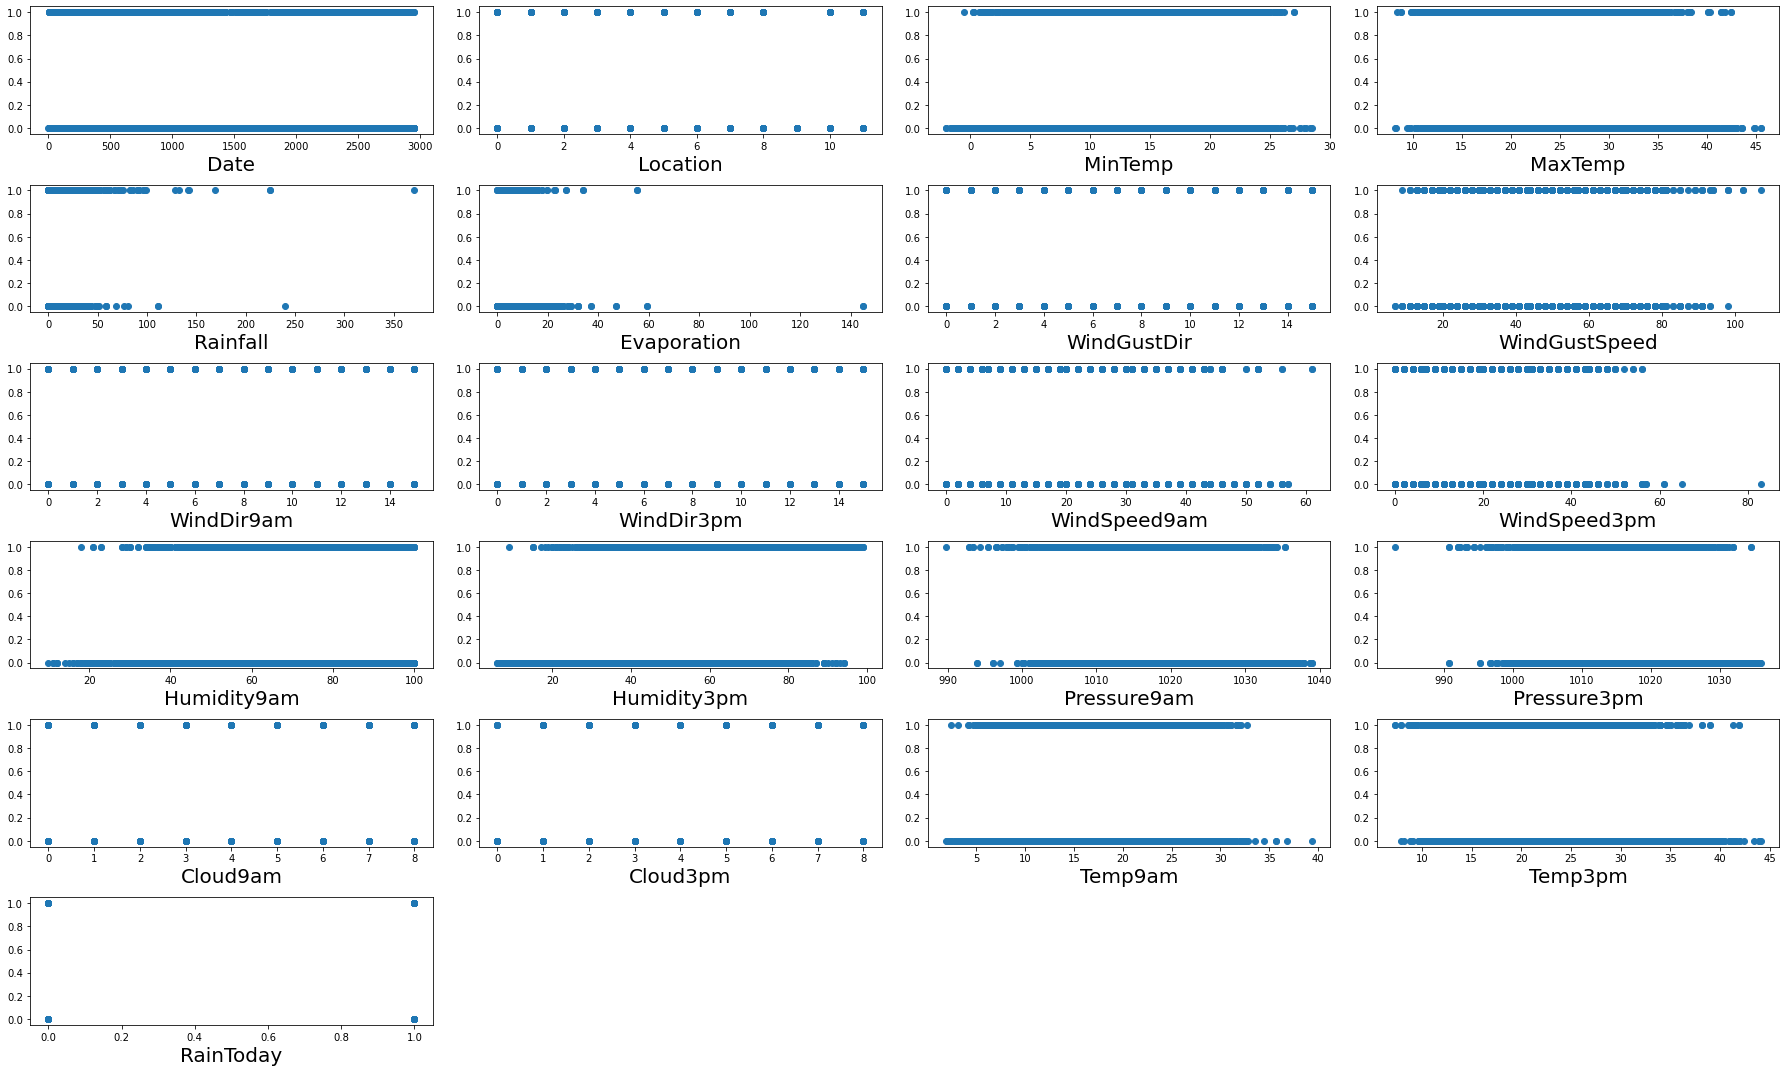

In [13]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 24:
        ax = plt.subplot(6,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Rainfall, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm column has co-relation with Label.

In [14]:
df.drop('RainTomorrow',axis=1).corrwith(df.RainTomorrow)

Date            -0.007486
Location         0.003981
MinTemp          0.100783
MaxTemp         -0.152213
Rainfall         0.225180
Evaporation     -0.058581
WindGustDir      0.052285
WindGustSpeed    0.193476
WindDir9am       0.030271
WindDir3pm       0.008350
WindSpeed9am     0.067277
WindSpeed3pm     0.048648
Humidity9am      0.280482
Humidity3pm      0.462661
Pressure9am     -0.171328
Pressure3pm     -0.144687
Cloud9am         0.225039
Cloud3pm         0.269453
Temp9am         -0.018561
Temp3pm         -0.195661
RainToday        0.325093
dtype: float64

Date, Location, WindDir9am, WindDir3pm and Temp9am have less/no co-relation with label

In [15]:
df = df.drop(['Date', 'Location', 'WindDir3pm'],axis=1)

'Date', 'Location' and 'WindDir3pm' has No co-relation with Label hence have dropped those columns

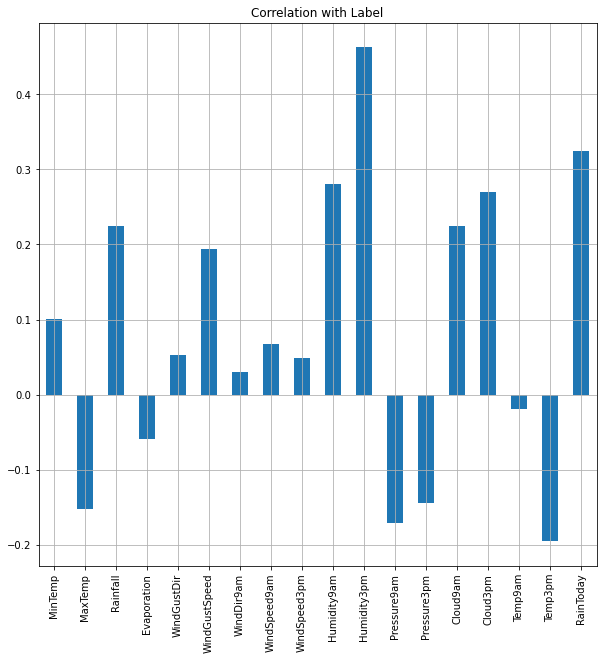

In [16]:
df.drop('RainTomorrow',axis=1).corrwith(df.RainTomorrow).plot(kind='bar',grid=True,figsize=(10,10),
                                                     title="Correlation with Label")
plt.show()

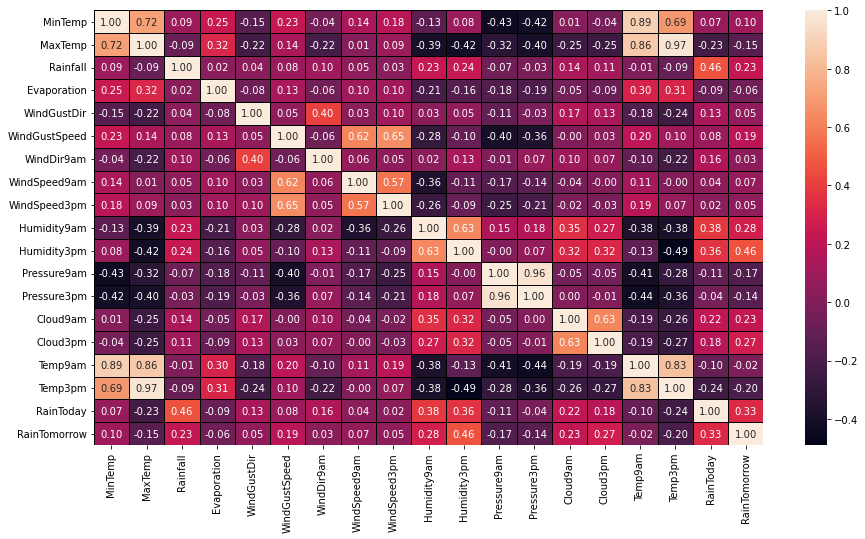

In [17]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

Multicollinearity problem exist in this database

1. Multicollinearity problem exist in Temp9am, MinTemp and MaxTemp columns.
2. Multicollinearity problem exist in Temp3pm, Temp9am and MaxTemp columns.

In [18]:
x = df[['MinTemp','MaxTemp','Temp3pm']]
y = df['Temp9am']

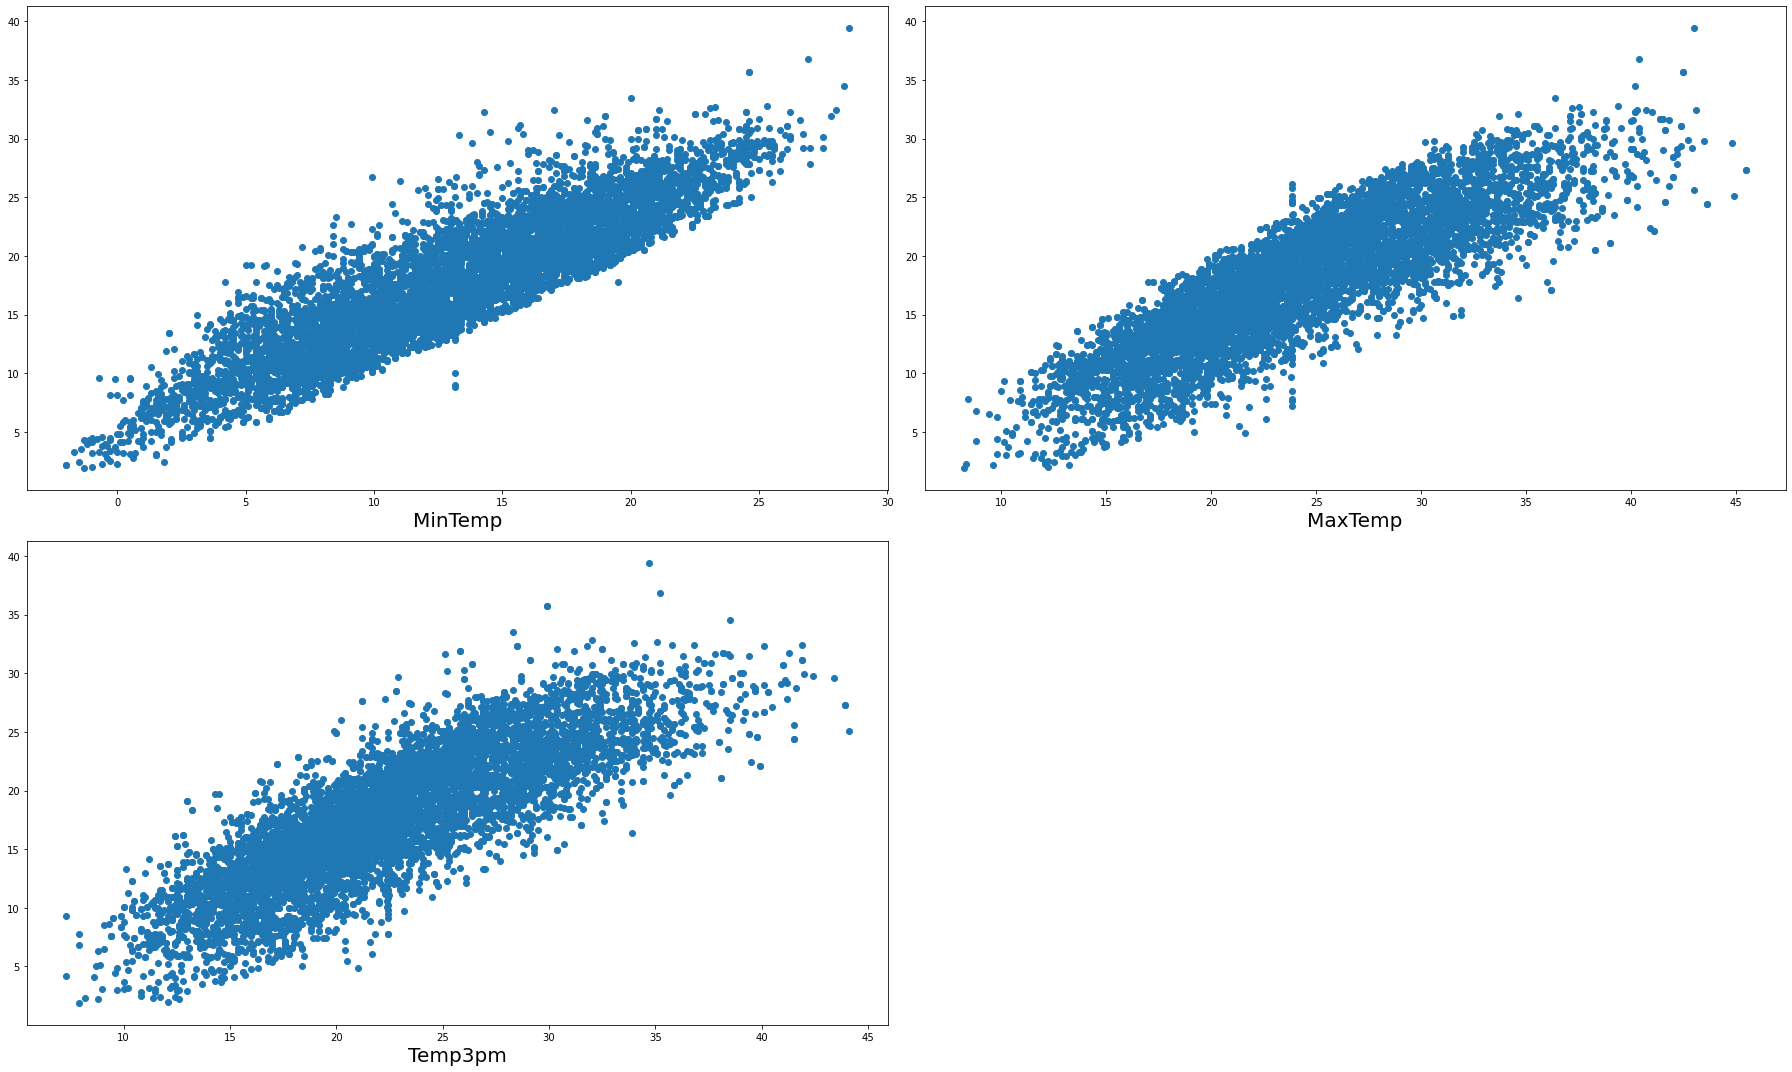

In [19]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 4:
        ax = plt.subplot(2,2,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

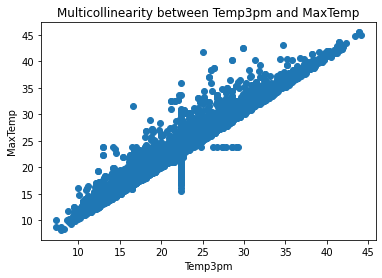

In [20]:
x = df['Temp3pm']
y = df['MaxTemp']
plt.scatter(x,y)
plt.xlabel('Temp3pm')
plt.ylabel('MaxTemp')
plt.title('Multicollinearity between Temp3pm and MaxTemp')
plt.show()

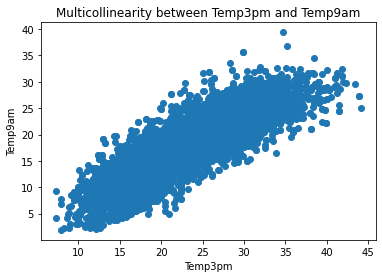

In [21]:
x = df['Temp3pm']
y = df['Temp9am']
plt.scatter(x,y)
plt.xlabel('Temp3pm')
plt.ylabel('Temp9am')
plt.title('Multicollinearity between Temp3pm and Temp9am')
plt.show()

In [22]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [23]:
x = df[['Temp9am','MinTemp', 'MaxTemp','Temp3pm']]
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,Features,VIF
0,Temp9am,105.756121
1,MinTemp,34.144054
2,MaxTemp,371.158407
3,Temp3pm,305.263382


Findings - 
1. Temp9am has Multicollinearity with Temp3pm, MaxTemp and MinTemp and high VIF score.
2. MaxTemp has highest Multicollinearity with Temp3pm and highest VIF score.

- Hence have dropped Temp9am and MaxTemp

In [24]:
df = df.drop(['Temp9am', 'MaxTemp'],axis=1)

In [25]:
x = df.drop('RainTomorrow',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,Features,VIF
0,MinTemp,34.017011
1,Rainfall,1.400585
2,Evaporation,3.361941
3,WindGustDir,4.420617
4,WindGustSpeed,20.280454
5,WindDir9am,4.674856
6,WindSpeed9am,5.716644
7,WindSpeed3pm,8.723474
8,Humidity9am,41.385510
9,Humidity3pm,32.569881


Pressure9am and Pressure3pm column has the high VIF and low co-relation with label hence have dropped the columns

In [26]:
df = df.drop(['Pressure9am', 'Pressure3pm'],axis=1)

In [27]:
x = df.drop('RainTomorrow',axis=1)
y = df['RainTomorrow']

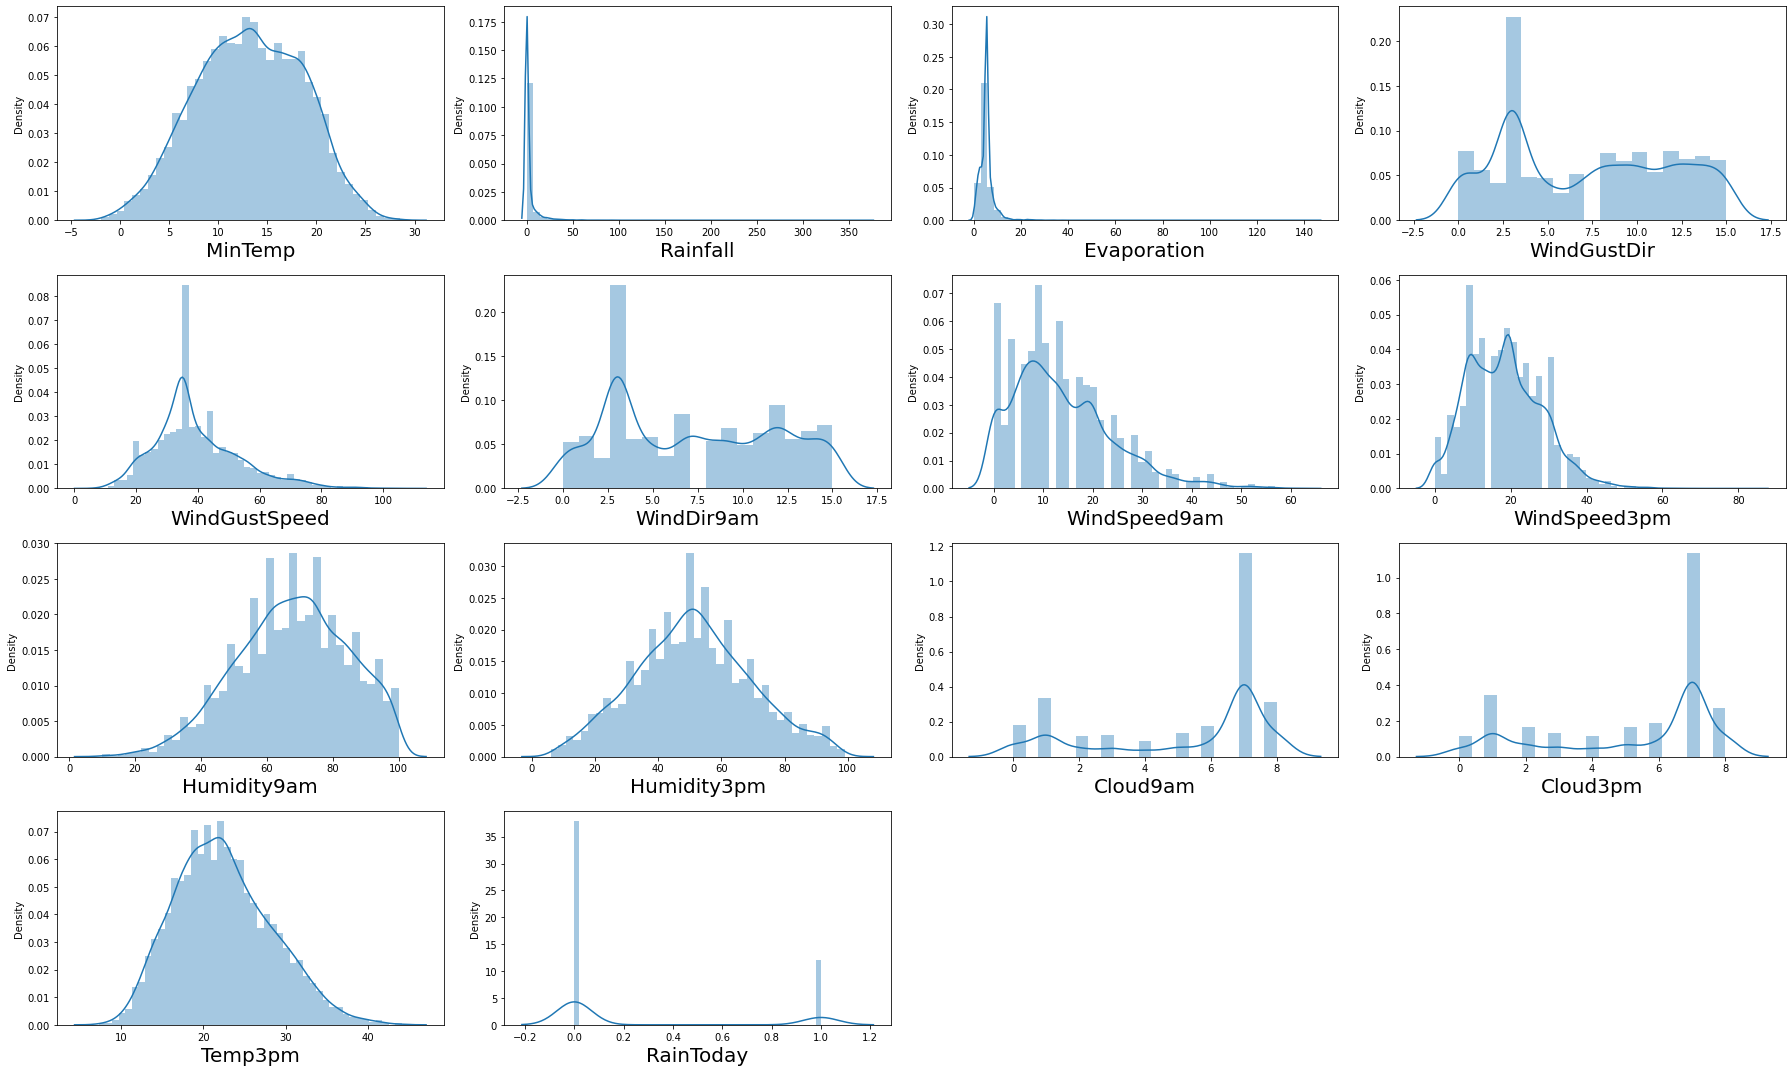

In [28]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 16:
        ax = plt.subplot(4,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Rainfall, Evaporation and RainToday are the continuous data columns and has skewness

In [29]:
df.skew()

MinTemp          -0.072615
Rainfall         13.073756
Evaporation      14.088154
WindGustDir       0.124451
WindGustSpeed     0.863517
WindDir9am        0.170742
WindSpeed9am      0.951907
WindSpeed3pm      0.520062
Humidity9am      -0.255715
Humidity3pm       0.120259
Cloud9am         -0.811652
Cloud3pm         -0.764534
Temp3pm           0.401031
RainToday         1.201947
RainTomorrow      1.229722
dtype: float64

Not considering skewness of categorical data columns

In [30]:
df.describe()

,MinTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
count,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.00000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000
mean,13.144839,2.802451,5.434730,7.196559,39.385939,7.252630,13.712836,18.319346,67.76705,51.207328,5.199282,5.180468,22.443498,0.242481,0.238148
std,5.412351,10.485324,3.897002,4.712348,13.848009,4.588372,10.140336,9.764471,16.83488,18.364618,2.691977,2.581738,5.933848,0.428610,0.425977
min,-2.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,10.00000,6.000000,0.000000,0.000000,7.300000,0.000000,0.000000
25%,9.200000,0.000000,4.000000,3.000000,31.000000,3.000000,6.000000,11.000000,56.00000,39.000000,3.000000,3.000000,18.100000,0.000000,0.000000
50%,13.200000,0.000000,5.434730,7.000000,35.000000,7.000000,11.000000,19.000000,68.00000,51.000000,7.000000,7.000000,21.900000,0.000000,0.000000
75%,17.300000,1.000000,5.434730,12.000000,48.000000,12.000000,20.000000,24.000000,80.00000,63.000000,7.000000,7.000000,26.300000,0.000000,0.000000
max,28.500000,371.000000,145.000000,15.000000,107.000000,15.000000,61.000000,83.000000,100.00000,99.000000,8.000000,8.000000,44.100000,1.000000,1.000000


Database is ready to remove outliers if exist 

In [31]:
x = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

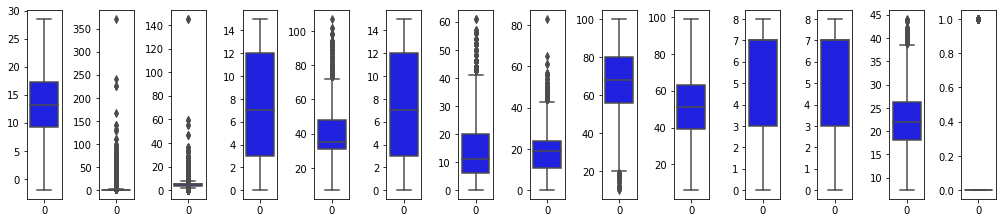

In [32]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am and Temp3pm has Outliers

In [33]:
old_data = (df.shape)[0]

In [34]:
q1 = df['Rainfall'].quantile(0.25)
q3 = df['Rainfall'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['Rainfall'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['Rainfall'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from Rainfall

In [35]:
q1 = df['Evaporation'].quantile(0.25)
q3 = df['Evaporation'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['Evaporation'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['Evaporation'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from Evaporation

In [36]:
q1 = df['WindGustSpeed'].quantile(0.25)
q3 = df['WindGustSpeed'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['WindGustSpeed'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['WindGustSpeed'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from WindGustSpeed

In [37]:
q1 = df['WindSpeed9am'].quantile(0.25)
q3 = df['WindSpeed9am'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['WindSpeed9am'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['WindSpeed9am'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)   

Removed outliers from WindSpeed9am

In [38]:
q1 = df['WindSpeed3pm'].quantile(0.25)
q3 = df['WindSpeed3pm'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['WindSpeed3pm'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['WindSpeed3pm'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from WindSpeed3pm

In [39]:
q1 = df['Humidity9am'].quantile(0.25)
q3 = df['Humidity9am'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['Humidity9am'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['Humidity9am'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from Humidity9am

In [40]:
q1 = df['Temp3pm'].quantile(0.25)
q3 = df['Temp3pm'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['Temp3pm'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['Temp3pm'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from Temp3pm

In [41]:
new_data = (df.shape)[0]

In [42]:
data_loss = old_data - new_data
print('Data Loss -',data_loss)

Data Loss - 3295


In [43]:
x = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

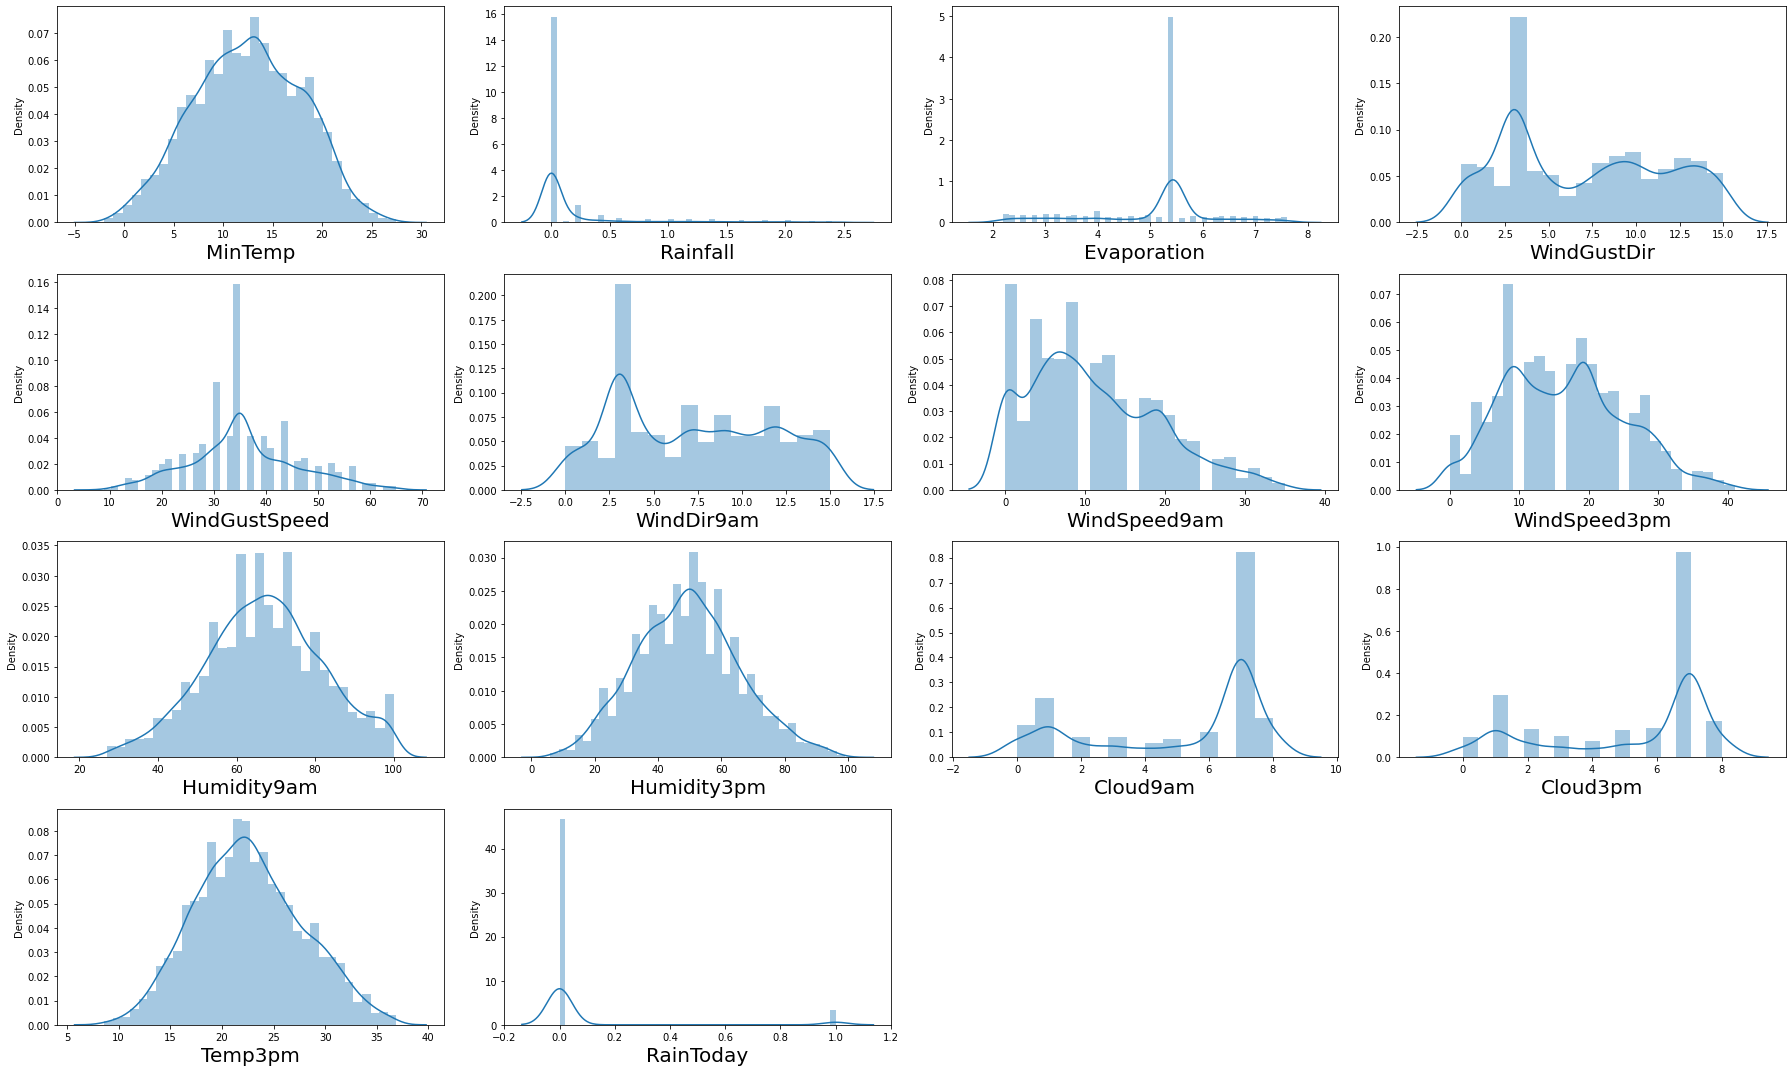

In [44]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 16:
        ax = plt.subplot(4,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

There is a skewness present in the data hence using PowerTransformer to remove it

In [45]:
scaler = PowerTransformer(method='yeo-johnson')

In [46]:
df[['Rainfall','Evaporation','WindSpeed9am']] = scaler.fit_transform(df[['Rainfall','Evaporation','WindSpeed9am']].values)

In [47]:
x = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

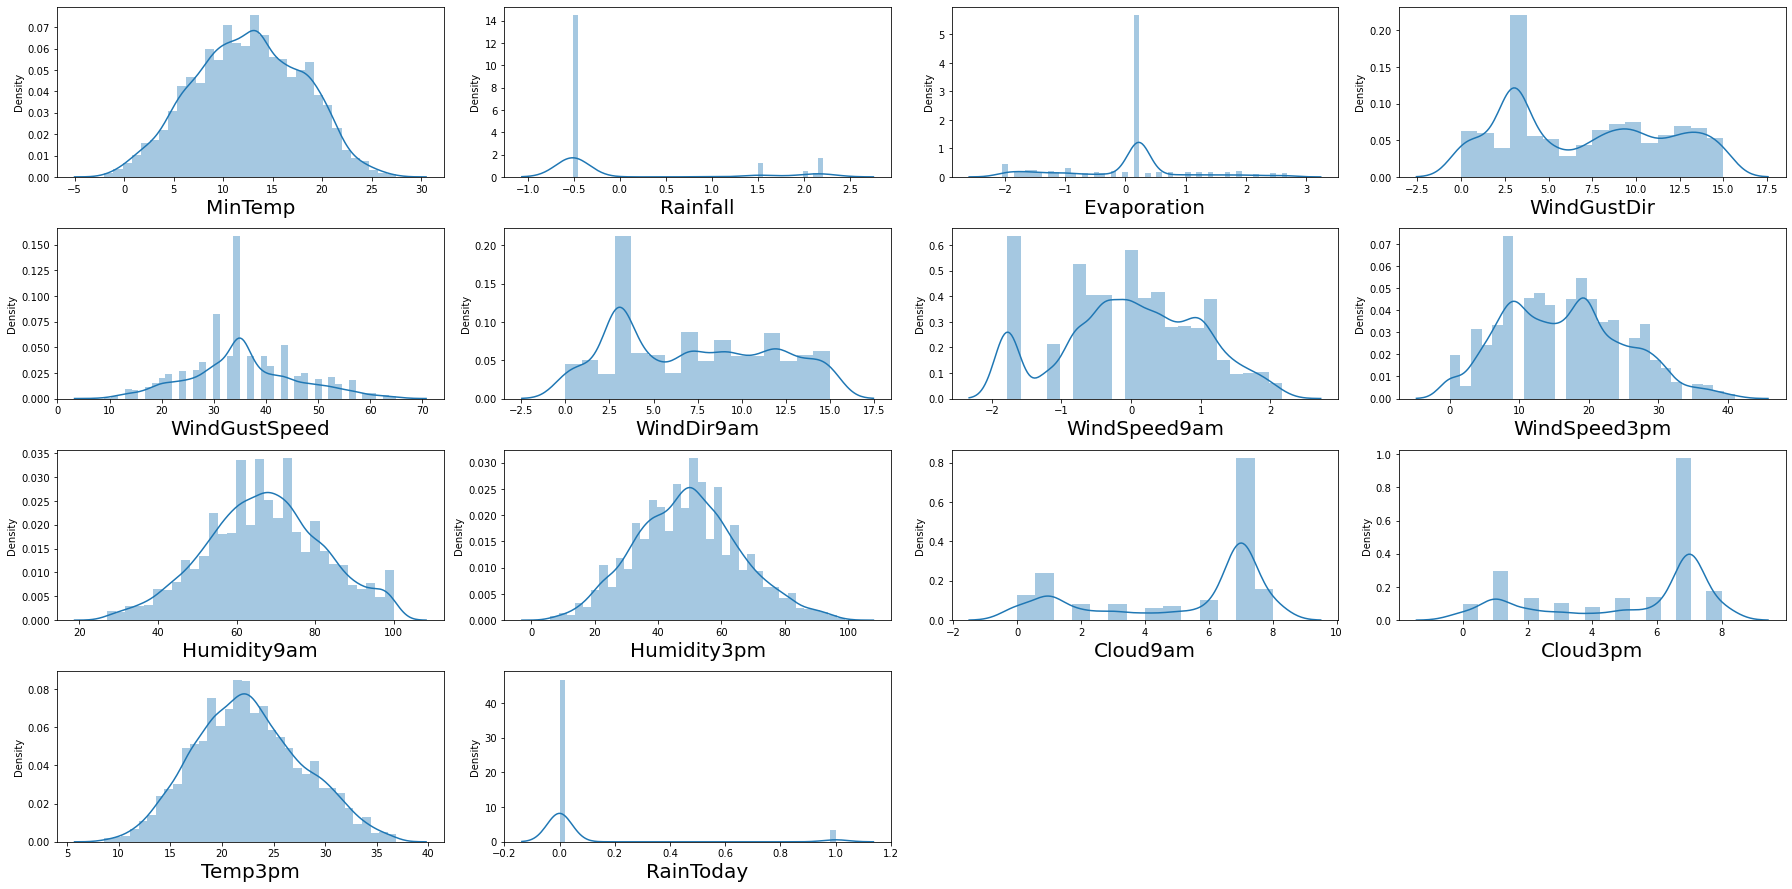

In [48]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 20:
        ax = plt.subplot(5,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Removed skewness from the data

In [49]:
x = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [50]:
df['RainTomorrow'].value_counts()

0.0    3996
1.0     788
Name: RainTomorrow, dtype: int64

There is a imbalance in the Label hence have applied OverSampling method to balance the dataset

In [51]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

Scaling the data

In [52]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.01,random_state = 65)

Have added test_size small so that we can not loose train data

In [53]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [54]:
ove_smp=SMOTE(0.75)

x_train_new, y_train_new = ove_smp.fit_sample(x_train, y_train)

In [55]:
print (y_train.value_counts())
print (y_train_new.value_counts())

0.0    3956
1.0     780
Name: RainTomorrow, dtype: int64
0.0    3956
1.0    2967
Name: RainTomorrow, dtype: int64


Now the data is balanced

In [56]:
X_scale = x_train_new
y = y_train_new

Scaled the Data

# Model Buidling

# LogisticRegression

In [57]:
maxAccu =0 
maxRS= 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    log = LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)

accuracy 0.7510109763142692 Random_state 1
max_accuracy 0.7510109763142692 max_Random_state 1
accuracy 0.7365684575389948 Random_state 2
accuracy 0.733102253032929 Random_state 3
accuracy 0.729636048526863 Random_state 4
accuracy 0.7377238590410168 Random_state 5
accuracy 0.731946851530907 Random_state 6
accuracy 0.7417677642980935 Random_state 7
accuracy 0.7400346620450606 Random_state 8
accuracy 0.7342576545349508 Random_state 9
accuracy 0.7203928365106874 Random_state 10
accuracy 0.7475447718082033 Random_state 11
accuracy 0.7359907567879839 Random_state 12
accuracy 0.7198151357596765 Random_state 13
accuracy 0.730791450028885 Random_state 14
accuracy 0.7371461582900057 Random_state 15
accuracy 0.7250144425187752 Random_state 16
accuracy 0.7463893703061814 Random_state 17
accuracy 0.7325245522819179 Random_state 18
accuracy 0.7458116695551704 Random_state 19
accuracy 0.7365684575389948 Random_state 20
accuracy 0.7394569612940497 Random_state 21
accuracy 0.7411900635470826 Random_sta

In [58]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 117)

In [59]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))
        
        scr_log = cross_val_score(clf,X_scale,y,cv=5)
        print('Cross Validation Score- ', scr_log.mean())

In [60]:
log = LogisticRegression()
log.fit(x_train,y_train)

print_score(log,x_train,x_test,y_train,y_test, train=True)
print_score(log,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 72.98%

===============Test Result===============
Accuracy Score: 75.91%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.78      0.82      0.80      1023
         1.0       0.72      0.67      0.69       708

    accuracy                           0.76      1731
   macro avg       0.75      0.74      0.75      1731
weighted avg       0.76      0.76      0.76      1731

Cross Validation Score-  0.7327765489034035


# RandomForestClassifier

In [61]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

print_score(rfc,x_train,x_test,y_train,y_test, train=True)
print_score(rfc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 99.90%

===============Test Result===============
Accuracy Score: 93.76%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1023
         1.0       0.94      0.90      0.92       708

    accuracy                           0.94      1731
   macro avg       0.94      0.93      0.94      1731
weighted avg       0.94      0.94      0.94      1731

Cross Validation Score-  0.9345714822311721


# DecisionTreeClassifier

In [62]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

print_score(dtc,x_train,x_test,y_train,y_test, train=True)
print_score(dtc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 99.90%

===============Test Result===============
Accuracy Score: 86.48%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.88      0.89      0.89      1023
         1.0       0.84      0.83      0.83       708

    accuracy                           0.86      1731
   macro avg       0.86      0.86      0.86      1731
weighted avg       0.86      0.86      0.86      1731

Cross Validation Score-  0.8642248700987041


# GradientBoostingClassifier

In [63]:
gbdt = GradientBoostingClassifier()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 87.21%

===============Test Result===============
Accuracy Score: 85.90%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      1023
         1.0       0.85      0.79      0.82       708

    accuracy                           0.86      1731
   macro avg       0.86      0.85      0.85      1731
weighted avg       0.86      0.86      0.86      1731

Cross Validation Score-  0.8448769850378749


# Support Vector Classifier

In [64]:
svc = SVC()
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test, train=True)
print_score(svc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 82.82%

===============Test Result===============
Accuracy Score: 82.32%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1023
         1.0       0.78      0.79      0.78       708

    accuracy                           0.82      1731
   macro avg       0.82      0.82      0.82      1731
weighted avg       0.82      0.82      0.82      1731

Cross Validation Score-  0.8089012124120949


# KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print_score(knn,x_train,x_test,y_train,y_test, train=True)
print_score(knn,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 89.45%

===============Test Result===============
Accuracy Score: 83.71%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.76      0.85      1023
         1.0       0.73      0.94      0.83       708

    accuracy                           0.84      1731
   macro avg       0.84      0.85      0.84      1731
weighted avg       0.86      0.84      0.84      1731

Cross Validation Score-  0.8507886938920306


# Findings

- LogisticsRegression - Cross Validation Score is 73.27%, Accuracy Score of Train Result is 72.98% and Test Result is 75.91%
- RandomForestClassifier - Cross Validation Score is 93.45%, Accuracy Score of Train Result is 99.90% and Test Result is 93.76%
- DecisionTreeClassifier - Cross Validation Score is 86.42%, Accuracy Score of Train Result is 99.90% and Test Result is 86.48%
- GradientBoostingClassifier - Cross Validation Score is 84.48%, Accuracy Score of Train Result is 87.21% and Test Result is 85.90%
- Support Vector Classifier - Cross Validation Score is 80.89%, Accuracy Score of Train Result is 82.82% and Test Result is 82.32%
- KNeighborsClassifier - Cross Validation Score is 85.07%, Accuracy Score of Train Result is 89.45% and Test Result is 83.71%

##### Choosing Support Vector Classifier model for hyper tuning since the train and test accuracy is high and close to each other

# Hyper Parameter Tuning

In [66]:
grid_param = {
    'C': range(1,5),
    'gamma':['scale', 'auto'],
    'shrinking': [True,False],
    'probability': [True,False],
}

Selecting Parameters for Hyper Parameter Tuning

In [67]:
grid_search = GridSearchCV(estimator=svc,
                           param_grid=grid_param,
                           cv=3,
                           n_jobs =-1
                          )

Searching the best grid for the model

In [68]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(1, 5), 'gamma': ['scale', 'auto'],
                         'probability': [True, False],
                         'shrinking': [True, False]})

Training the model (Note:- Have not added more parameters since it was taking a long time to train and the laptop is not that powerful to load this code hence have removed some parameters)

In [69]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 4, 'gamma': 'auto', 'probability': True, 'shrinking': True}


In [70]:
svc = SVC(C= 4, gamma= 'auto', probability= True, shrinking= True)
svc.fit(x_train,y_train)

SVC(C=4, gamma='auto', probability=True)

Applying best parameters to train the model

In [71]:
y_pred = svc.predict(x_test)
pred = svc.predict(x_train)

In [72]:
print(f'Train Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%')
print(f'Test Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(classification_report(y_test, y_pred))

Train Accuracy Score: 88.83%
Test Accuracy Score: 85.62%
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88      1023
         1.0       0.80      0.86      0.83       708

    accuracy                           0.86      1731
   macro avg       0.85      0.86      0.85      1731
weighted avg       0.86      0.86      0.86      1731



- Previous Train accuracy score - 82.82% and New Train accuracy score - 88.83%
- Previous Test accuracy score - 82.32% and New Test accuracy score - 85.62%

# AUR ROC Curve

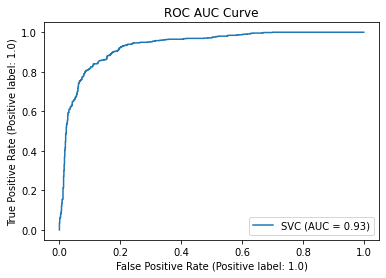

In [73]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc,x_test,y_test)
plt.title("ROC AUC Curve")
plt.show()

#### Accuracy score of Support Vector Classifier after Tuning the model is 85.62% and AUC score is 93% which is pretty good

## Saving the Model

In [74]:
file = 'Rainfall_Prediction_Classification.pickle'
pickle.dump(svc, open(file, 'wb'))

# Regression Model

In [134]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [136]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Except Date and Location column every other column has NaN values

In [137]:
df = df.dropna(subset=['Rainfall','RainTomorrow'])

Dropped NaN present in the Label Columns

In [138]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [139]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['WindGustDir'] = df['WindGustDir'].fillna('N')
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(35.0)
df['WindDir9am'] = df['WindDir9am'].fillna('N')
df['WindDir3pm'] = df['WindDir3pm'].fillna('SE')
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(9.0)
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(9.0)
df['Humidity9am'] = df['Humidity9am'].fillna(73.0)
df['Humidity3pm'] = df['Humidity3pm'].fillna(51.0)
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(7.0)
df['Cloud3pm'] = df['Cloud3pm'].fillna(7.0)
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

- Used Mean to fill NaN in columns that have continuous data.
- Used Mode to fill NaN in columns that does not have continuous data.
- Used Mode to fill NaN in columns that has categorical data.

In [141]:
df = df.drop('Sunshine',axis=1)

Dropped the Sunshine column since half of the data is NaN hence filling the NaN would make the model biased.

In [142]:
for i in df.columns:
    a=df[i].value_counts()
    b=len(a.index)
    print(i,'column has',b,'categorical data counts\n')

Date column has 2957 categorical data counts

Location column has 12 categorical data counts

MinTemp column has 286 categorical data counts

MaxTemp column has 332 categorical data counts

Rainfall column has 250 categorical data counts

Evaporation column has 116 categorical data counts

WindGustDir column has 16 categorical data counts

WindGustSpeed column has 51 categorical data counts

WindDir9am column has 16 categorical data counts

WindDir3pm column has 16 categorical data counts

WindSpeed9am column has 33 categorical data counts

WindSpeed3pm column has 35 categorical data counts

Humidity9am column has 90 categorical data counts

Humidity3pm column has 94 categorical data counts

Pressure9am column has 383 categorical data counts

Pressure3pm column has 374 categorical data counts

Cloud9am column has 9 categorical data counts

Cloud3pm column has 9 categorical data counts

Temp9am column has 305 categorical data counts

Temp3pm column has 328 categorical data counts

RainT

Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow columns are the categorical columns

In [143]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

Endcoded data into Int

In [144]:
df.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,...,8079.00000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000
mean,1284.867929,5.775220,13.144839,23.855364,2.802451,5.434730,7.196559,39.385939,7.252630,7.808021,...,67.76705,51.207328,1017.732352,1015.310437,5.199282,5.180468,17.757271,22.443498,0.242481,0.238148
std,847.190840,3.174035,5.412351,6.104662,10.485324,3.897002,4.712348,13.848009,4.588372,4.433035,...,16.83488,18.364618,6.262483,6.193205,2.691977,2.581738,5.611654,5.933848,0.428610,0.425977
min,0.000000,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,10.00000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,575.000000,3.000000,9.200000,19.300000,0.000000,4.000000,3.000000,31.000000,3.000000,4.000000,...,56.00000,39.000000,1014.100000,1011.500000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000
50%,1095.000000,6.000000,13.200000,23.300000,0.000000,5.434730,7.000000,35.000000,7.000000,8.000000,...,68.00000,51.000000,1017.732352,1015.310437,7.000000,7.000000,17.757271,21.900000,0.000000,0.000000
75%,2011.000000,8.000000,17.300000,28.000000,1.000000,5.434730,12.000000,48.000000,12.000000,11.000000,...,80.00000,63.000000,1021.400000,1018.900000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000
max,2956.000000,11.000000,28.500000,45.500000,371.000000,145.000000,15.000000,107.000000,15.000000,15.000000,...,100.00000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


In [145]:
x = df.drop(['Rainfall'],axis=1)
y = df['Rainfall']

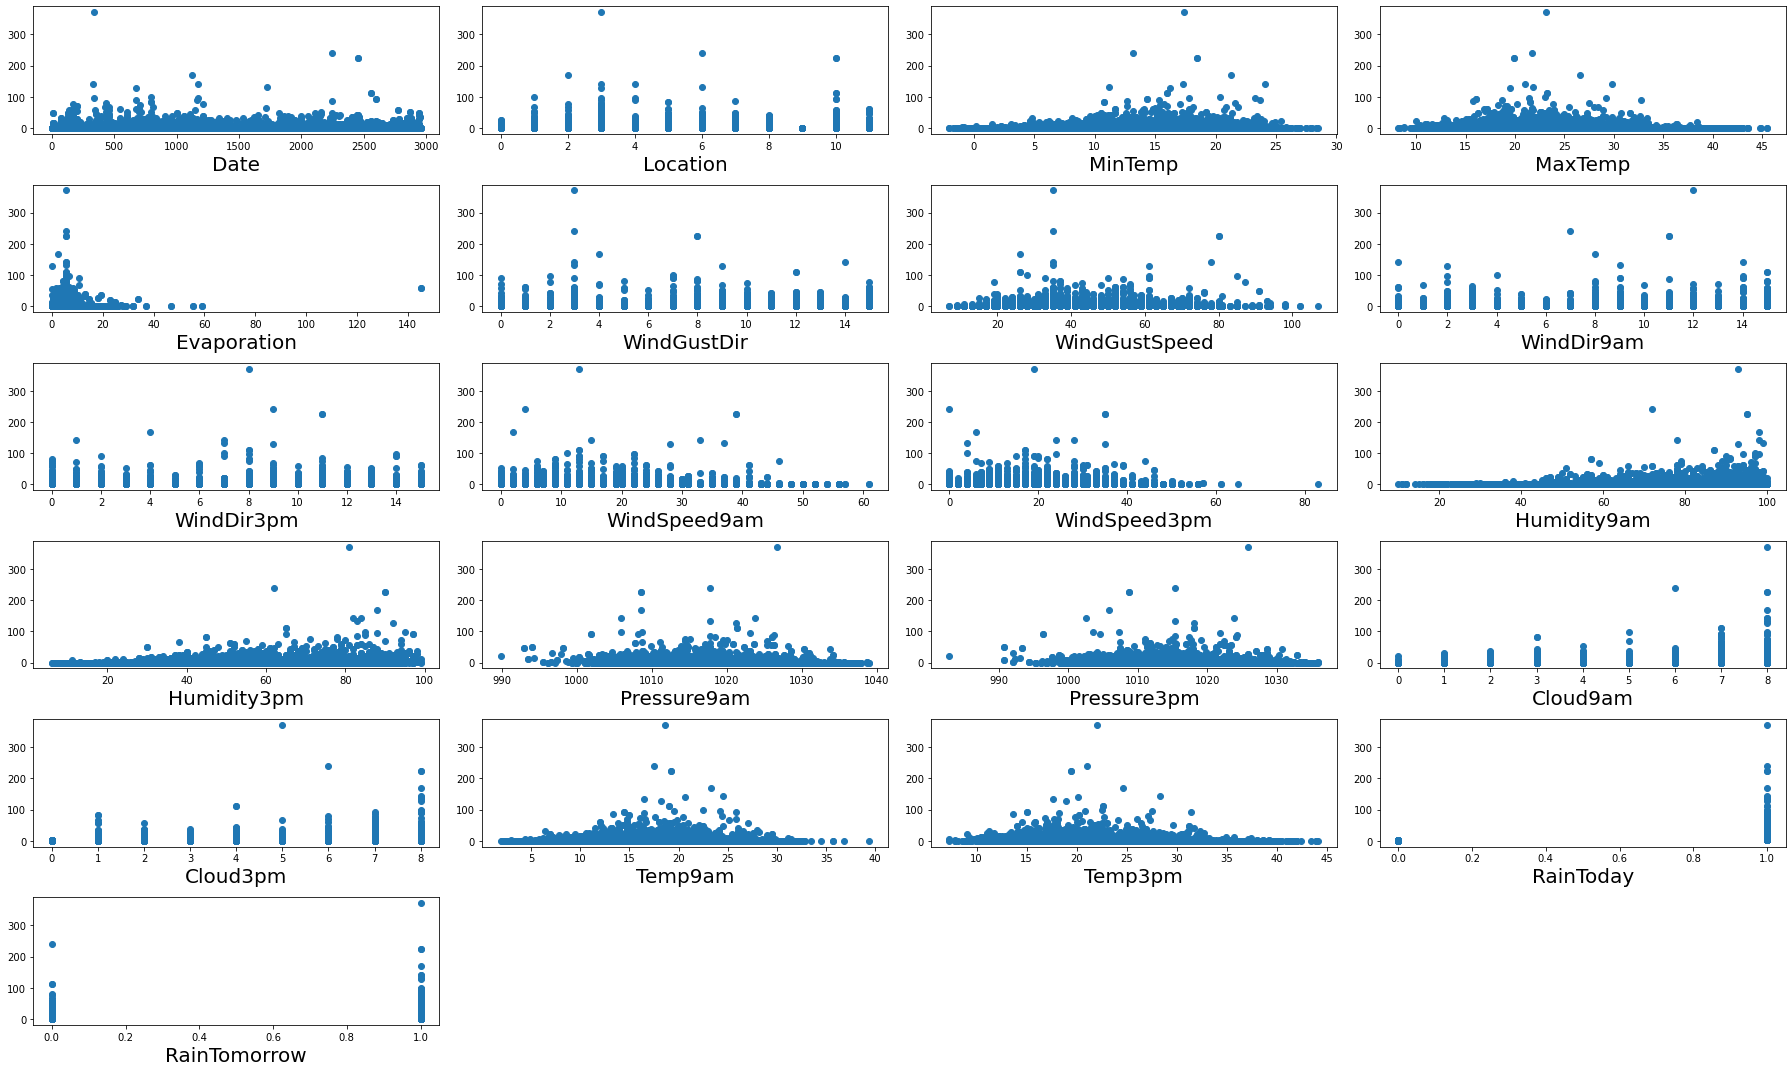

In [146]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 24:
        ax = plt.subplot(6,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Humidity9am, Humidity3pm, RainToday and RainTomorrow column has co-relation with Label.

In [147]:
df.drop('Rainfall',axis=1).corrwith(df.Rainfall)

Date             0.004535
Location         0.007510
MinTemp          0.088596
MaxTemp         -0.088665
Evaporation      0.024173
WindGustDir      0.037976
WindGustSpeed    0.083481
WindDir9am       0.095435
WindDir3pm       0.038350
WindSpeed9am     0.050462
WindSpeed3pm     0.026991
Humidity9am      0.230333
Humidity3pm      0.237974
Pressure9am     -0.074157
Pressure3pm     -0.034438
Cloud9am         0.139602
Cloud3pm         0.105662
Temp9am         -0.007149
Temp3pm         -0.091750
RainToday        0.462347
RainTomorrow     0.225180
dtype: float64

Date, Location, Evaporation, WindSpeed3pm and Temp9am have less/no co-relation with label

In [148]:
df = df.drop(['Date', 'Location', 'Temp9am'],axis=1)

'Date', 'Location' and 'Temp9am' has No co-relation with Label hence have dropped those columns

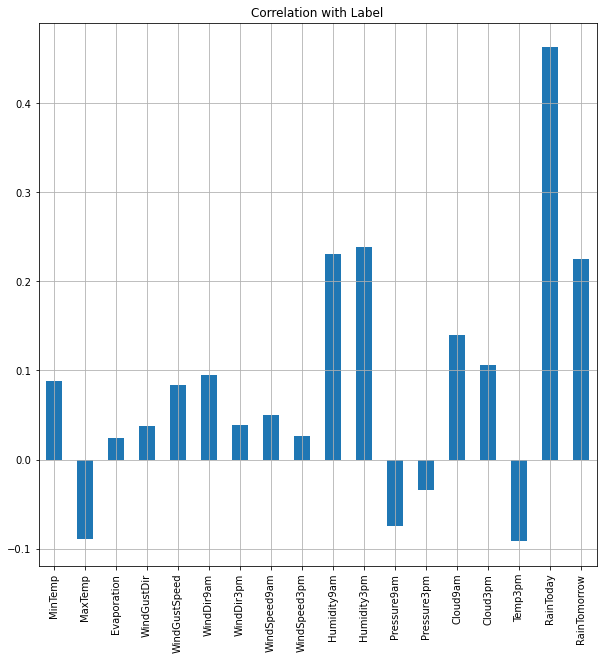

In [149]:
df.drop('Rainfall',axis=1).corrwith(df.Rainfall).plot(kind='bar',grid=True,figsize=(10,10),
                                                     title="Correlation with Label")
plt.show()

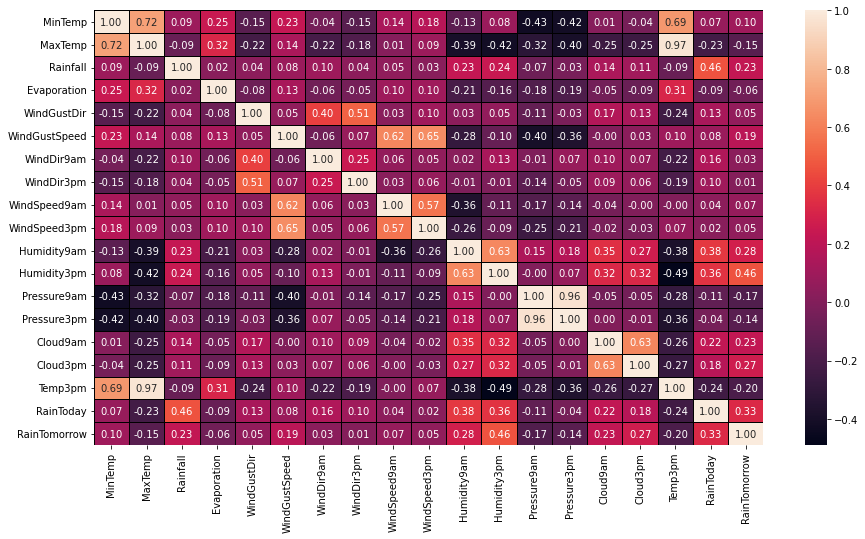

In [150]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

Multicollinearity problem exist in this database

- Multicollinearity problem exist in Temp3pm and MaxTemp columns.

In [155]:
x = df['MaxTemp']
y = df['Temp3pm']

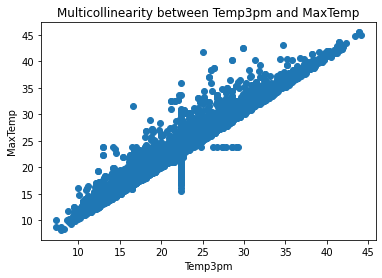

In [156]:
x = df['Temp3pm']
y = df['MaxTemp']
plt.scatter(x,y)
plt.xlabel('Temp3pm')
plt.ylabel('MaxTemp')
plt.title('Multicollinearity between Temp3pm and MaxTemp')
plt.show()

In [157]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [158]:
x = df[['MaxTemp','Temp3pm']]
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,Features,VIF
0,MaxTemp,302.612862
1,Temp3pm,302.612862


In [159]:
df = df.drop('MaxTemp',axis=1)

In [160]:
x = df.drop('Rainfall',axis=1)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,Features,VIF
0,MinTemp,34.125661
1,Evaporation,3.346583
2,WindGustDir,5.258048
3,WindGustSpeed,21.404090
4,WindDir9am,4.668767
5,WindDir3pm,5.954670
6,WindSpeed9am,5.719064
7,WindSpeed3pm,8.771441
8,Humidity9am,41.273705
9,Humidity3pm,35.255753


Pressure9am and Pressure3pm column has the high VIF and low co-relation with label hence have dropped the columns

In [161]:
df = df.drop(['Pressure9am', 'Pressure3pm'],axis=1)

In [162]:
x = df.drop('Rainfall',axis=1)
y = df['Rainfall']

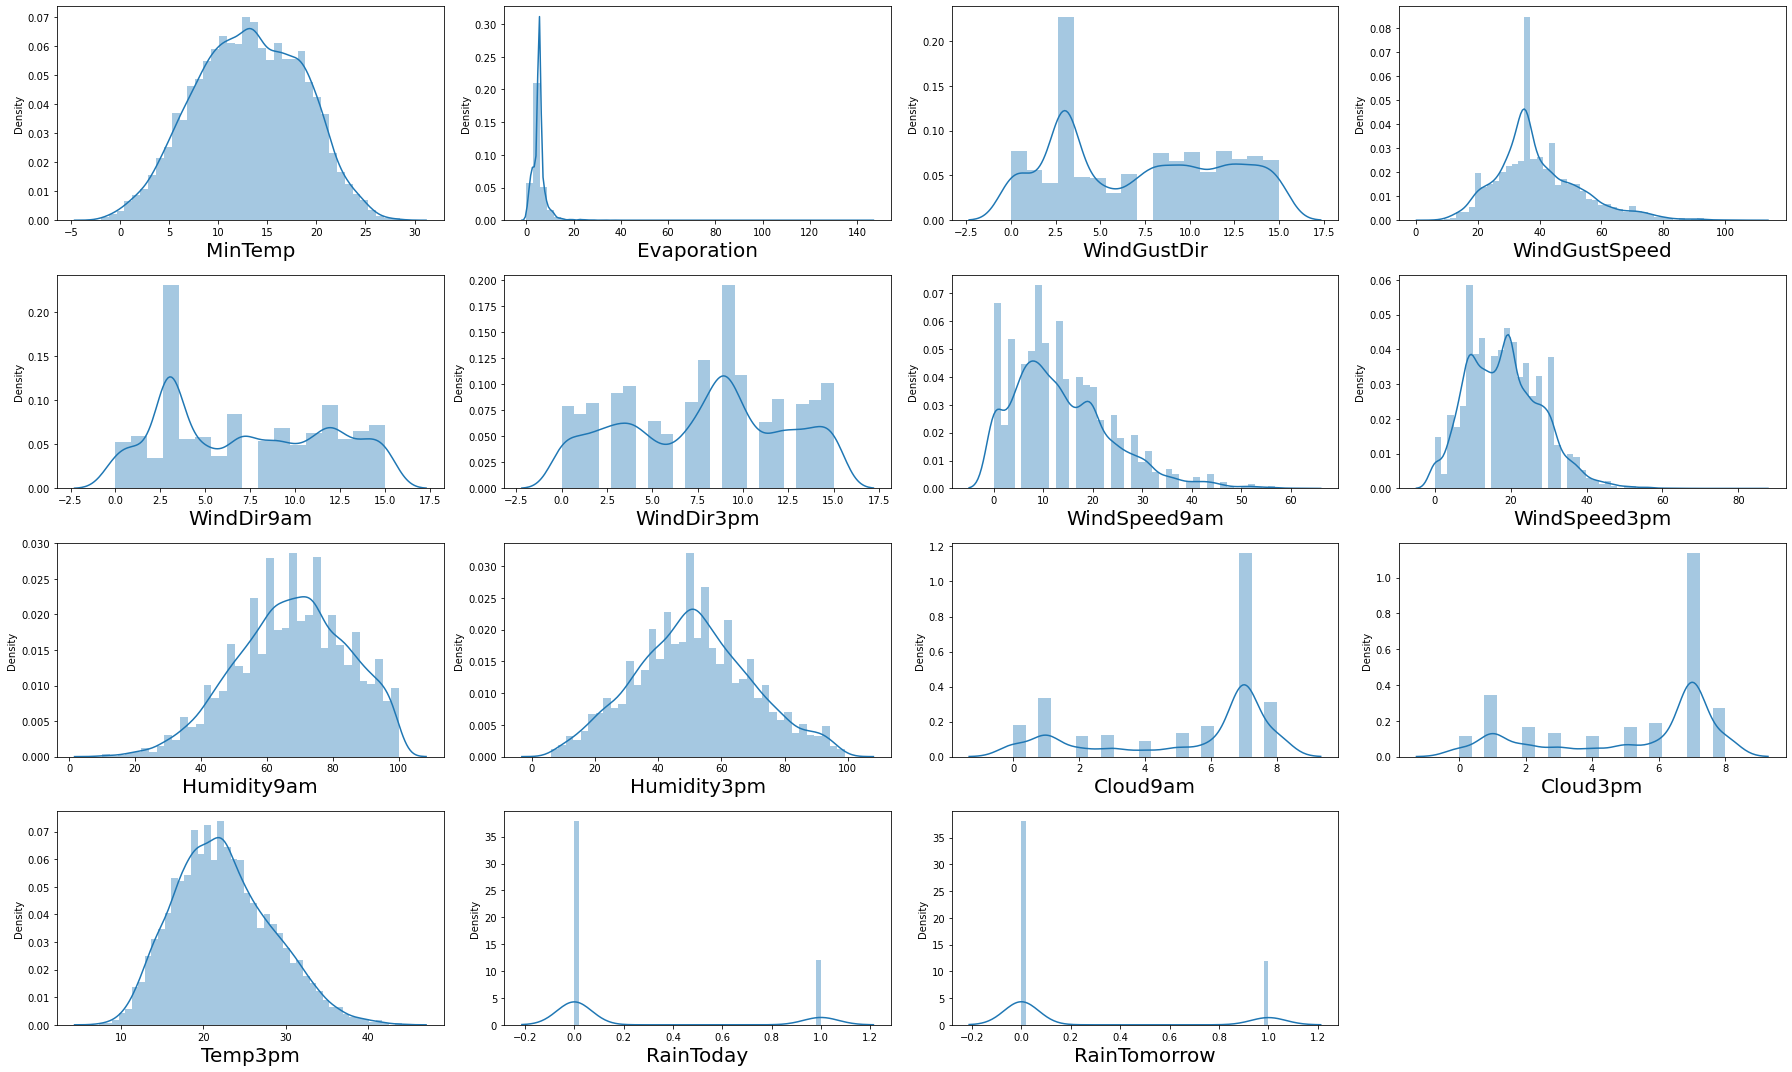

In [163]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 16:
        ax = plt.subplot(4,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Evaporation, RainTomorrow and RainToday are the continuous data columns and has skewness

In [164]:
df.skew()

MinTemp          -0.072615
Rainfall         13.073756
Evaporation      14.088154
WindGustDir       0.124451
WindGustSpeed     0.863517
WindDir9am        0.170742
WindDir3pm       -0.113627
WindSpeed9am      0.951907
WindSpeed3pm      0.520062
Humidity9am      -0.255715
Humidity3pm       0.120259
Cloud9am         -0.811652
Cloud3pm         -0.764534
Temp3pm           0.401031
RainToday         1.201947
RainTomorrow      1.229722
dtype: float64

In [165]:
df.describe()

,MinTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
count,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.00000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000
mean,13.144839,2.802451,5.434730,7.196559,39.385939,7.252630,7.808021,13.712836,18.319346,67.76705,51.207328,5.199282,5.180468,22.443498,0.242481,0.238148
std,5.412351,10.485324,3.897002,4.712348,13.848009,4.588372,4.433035,10.140336,9.764471,16.83488,18.364618,2.691977,2.581738,5.933848,0.428610,0.425977
min,-2.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,10.00000,6.000000,0.000000,0.000000,7.300000,0.000000,0.000000
25%,9.200000,0.000000,4.000000,3.000000,31.000000,3.000000,4.000000,6.000000,11.000000,56.00000,39.000000,3.000000,3.000000,18.100000,0.000000,0.000000
50%,13.200000,0.000000,5.434730,7.000000,35.000000,7.000000,8.000000,11.000000,19.000000,68.00000,51.000000,7.000000,7.000000,21.900000,0.000000,0.000000
75%,17.300000,1.000000,5.434730,12.000000,48.000000,12.000000,11.000000,20.000000,24.000000,80.00000,63.000000,7.000000,7.000000,26.300000,0.000000,0.000000
max,28.500000,371.000000,145.000000,15.000000,107.000000,15.000000,15.000000,61.000000,83.000000,100.00000,99.000000,8.000000,8.000000,44.100000,1.000000,1.000000


Database is ready to remove outliers if exist

In [166]:
x = df.drop(['Rainfall'],axis=1)
y = df['Rainfall'] 

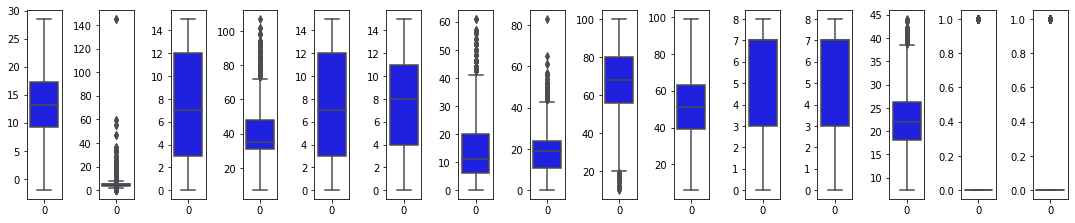

In [167]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am and Temp3pm has Outliers

In [168]:
old_data = (df.shape)[0]

In [169]:
q1 = df['Evaporation'].quantile(0.25)
q3 = df['Evaporation'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['Evaporation'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['Evaporation'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from Evaporation

In [170]:
q1 = df['WindGustSpeed'].quantile(0.25)
q3 = df['WindGustSpeed'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['WindGustSpeed'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['WindGustSpeed'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from WindGustSpeed

In [171]:
q1 = df['WindSpeed9am'].quantile(0.25)
q3 = df['WindSpeed9am'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['WindSpeed9am'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['WindSpeed9am'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from WindSpeed9am

In [172]:
q1 = df['WindSpeed3pm'].quantile(0.25)
q3 = df['WindSpeed3pm'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['WindSpeed3pm'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['WindSpeed3pm'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from WindSpeed3pm

In [173]:
q1 = df['Humidity9am'].quantile(0.25)
q3 = df['Humidity9am'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['Humidity9am'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['Humidity9am'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from Humidity9am

In [174]:
q1 = df['Temp3pm'].quantile(0.25)
q3 = df['Temp3pm'].quantile(0.75)
iqr = q3 - q1

upper = df.iloc[np.where(df['Temp3pm'] > (q3+1.5*iqr))]
lower = df.iloc[np.where(df['Temp3pm'] < (q1-1.5*iqr))]

a = upper.index
b = lower.index

df.drop(a, inplace = True)
df.drop(b, inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed outliers from Temp3pm

In [175]:
new_data = (df.shape)[0]

In [176]:
data_loss = old_data - new_data
print('Lost', data_loss,'no. of Data')

Lost 2124 no. of Data


In [177]:
x = df.drop(['Rainfall'],axis=1)
y = df['Rainfall']

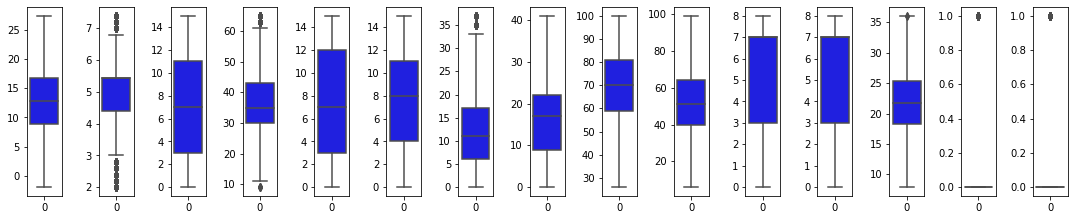

In [178]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Removed Outliers that are not allowed above and below the specified limit

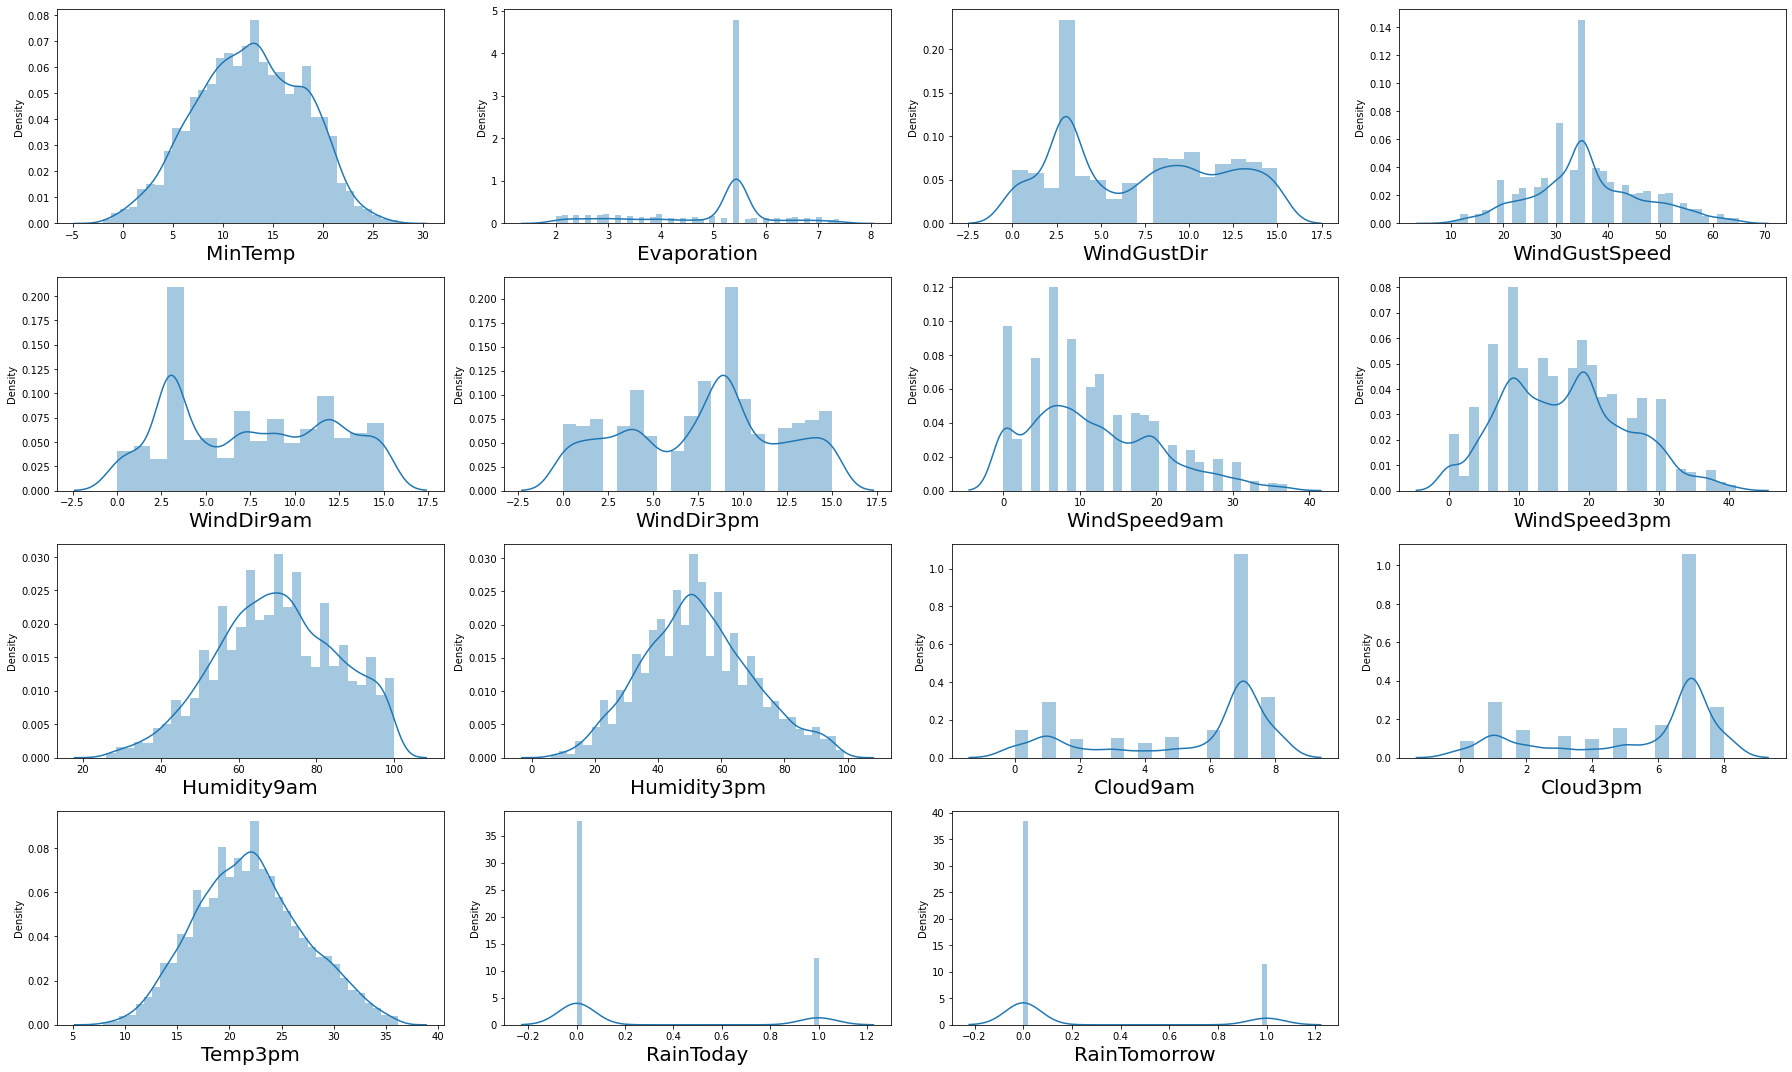

In [179]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 16:
        ax = plt.subplot(4,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

There is a skewness present in the data hence using PowerTransformer to remove it

In [180]:
x = df.drop(['Rainfall'],axis=1)
y = df['Rainfall']

In [181]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

Scaled the data

# LinearRegression

In [182]:
reg = LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    reg.fit(x_train, y_train)
    x_pred = reg.predict(x_train)
    y_pred = reg.predict(x_test)
    print("At Random state", (i), "the training accuracy is :-", (r2_score (y_train,x_pred)))
    print("At Random state", (i), "the testing accuracy is :-", (r2_score (y_test,y_pred)))
    print('\n')

At Random state 0 the training accuracy is :- 0.20644111278107313
At Random state 0 the testing accuracy is :- 0.31413180893312787


At Random state 1 the training accuracy is :- 0.2128725845017586
At Random state 1 the testing accuracy is :- 0.3430434881722889


At Random state 2 the training accuracy is :- 0.20637309331873277
At Random state 2 the testing accuracy is :- 0.3351009152737644


At Random state 3 the training accuracy is :- 0.21240543155029212
At Random state 3 the testing accuracy is :- 0.31002839565835927


At Random state 4 the training accuracy is :- 0.3046929211952256
At Random state 4 the testing accuracy is :- 0.1475786819311048


At Random state 5 the training accuracy is :- 0.2615863222479988
At Random state 5 the testing accuracy is :- 0.172733682691681


At Random state 6 the training accuracy is :- 0.20932003613599381
At Random state 6 the testing accuracy is :- 0.3479477162167687


At Random state 7 the training accuracy is :- 0.3085613490454707
At Random sta

In [183]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 85)

In [184]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {r2_score (y_train,y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {r2_score (y_test,pred)*100:.2f}%') 
        
        print ('\n mean_absolute_error',mean_absolute_error(y_test,pred))
        print ('\n mean_squared_error',mean_squared_error (y_test,pred))
         

In [185]:
reg = LinearRegression()
reg.fit(x_train,y_train)

print_score(reg,x_train,x_test,y_train,y_test, train=True)
print_score(reg,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 22.74%

===============Test Result===============
Accuracy Score: 22.64%

 mean_absolute_error 2.9753210640424785

 mean_squared_error 72.97908062572722


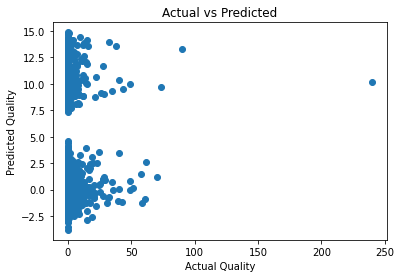

In [186]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted')
plt.show()

In [187]:
Lassocv = LassoCV(alphas = np.arange(0.001,0.1,0.01), max_iter = 100, normalize = True)
Lassocv.fit(x_train, y_train)
alpha = Lassocv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)
prediction = lasso_reg.predict(x_test)
r2_score(y_test, prediction)

0.2263695880183867

In [188]:
rdgcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
rdgcv.fit(x_train, y_train)
alpha = rdgcv.alpha_
rd_model = Ridge(alpha)
rd_model.fit(x_train, y_train)
prediction = rd_model.predict(x_test)
r2_score(y_test, prediction)

0.22635615689675903

# Support Vector Regression

In [189]:
svr = SVR()
svr.fit(x_train,y_train)

print_score(svr,x_train,x_test,y_train,y_test, train=True)
print_score(svr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 18.26%

===============Test Result===============
Accuracy Score: 18.44%

 mean_absolute_error 1.9205058148290983

 mean_squared_error 76.94069373445909


# DecisionTreeRegressor

In [190]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

print_score(dtr,x_train,x_test,y_train,y_test, train=True)
print_score(dtr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 100.00%

===============Test Result===============
Accuracy Score: -174.64%

 mean_absolute_error 2.4710275352585627

 mean_squared_error 259.0695709872398


# AdaBoostRegressor

In [191]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

print_score(ada,x_train,x_test,y_train,y_test, train=True)
print_score(ada,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: -3.42%

===============Test Result===============
Accuracy Score: -55.70%

 mean_absolute_error 8.565954545664997

 mean_squared_error 146.8731303720723


# GradientBoostingRegressor

In [192]:
gbdt = GradientBoostingRegressor()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 61.09%

===============Test Result===============
Accuracy Score: 18.84%

 mean_absolute_error 2.4142697765444616

 mean_squared_error 76.56131166709352


# RandomForestRegressor

In [193]:
rfr = GradientBoostingRegressor()
rfr.fit(x_train,y_train)

print_score(rfr,x_train,x_test,y_train,y_test, train=True)
print_score(rfr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 61.09%

===============Test Result===============
Accuracy Score: 18.84%

 mean_absolute_error 2.414527959860081

 mean_squared_error 76.56294744151799


# KNeighborsRegressor

In [194]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)

print_score(knr,x_train,x_test,y_train,y_test, train=True)
print_score(knr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 44.14%

===============Test Result===============
Accuracy Score: 19.56%

 mean_absolute_error 2.349254533243788

 mean_squared_error 75.8832354600403


# Findings

- LinearRegression train accuracy score 22.74% and test accuracy score 22.64%
- Support Vector Regression train accuracy score 18.26% and test accuracy score 18.44%
- DecisionTreeRegressor train accuracy score 100.00% and test accuracy score -174.64%
- AdaBoostRegressor train accuracy score -3.42% and test accuracy score -55.70%
- GradientBoostingRegressor train accuracy score 61.09% and test accuracy score 18.84%
- RandomForestRegressor train accuracy score 61.09% and test accuracy score 18.84%
- KNeighborsRegressor train accuracy score 44.14% and test accuracy score 19.56%

# Conclusion

#### Selecting LinearRegression since the Accuracy score and test scores are clsoe to each other, however for this dataset the accuracy is not acceptable.

# Saving the Model

In [195]:
file = 'Rainfall_Prediction_Regression.pickle'
pickle.dump(reg, open(file, 'wb'))